In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt 

## Get MNIST Data. 
### MNIST data loacted in tensorflow > keras > datasets > mnist 
### Split data to (train images, train labels) and (test images, test labels)

## import library

In [28]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### There are Total 60000 Train images and Train labels. (6000 images for single class)
### Shape of single image is 28 x 28 (pixel)
### 

In [29]:
print('Shape of Train images :',train_images.shape)
print('Shape of Train labels : ', train_labels.shape)
print('\nShape of Test images : ', test_images.shape)
print("Shape of Test labels : ",test_labels.shape)

Shape of Train images : (60000, 28, 28)
Shape of Train labels :  (60000,)

Shape of Test images :  (10000, 28, 28)
Shape of Test labels :  (10000,)


In [30]:
print('Train labels : ',train_labels)

Train labels :  [5 0 4 ... 5 6 8]


## Plot first train image. 
### when value is close to 0 : dark 
### when value is close to 255 : white

In [31]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

### Plot First 10 Train images and Corresponding labels  

First 10 Train images in MNIST dataset



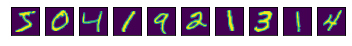


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [32]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n',train_labels[:10])



## Important
### Change data shape (60000 x 28 x 28) to (60000 x 28 x 28 x 1)


In [33]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

# Select one convolution model below 
## There are 3 example models. 
## 3, 5, 7 layer each 
## MODEL 1 : 3 Layers with 1 Convolution layer  
## MODEL 2 : 5 Layers with 2 Convolution layer 
## MODEL 3 : 7 Layers with 4 Convolution layer 

In [34]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model 




In [40]:
model1 = select_model(1)
model2 = select_model(2)
model3 = select_model(3)

## If you want to see information of model, model.summary() will help
### summary() is also built in function 

In [42]:
model1.summary()
model2.summary()
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)               

## Components in training step 
### Optimizer, Loss function, accuracy metrics 

In [43]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training Step 
## Training for 5 epochs. 

In [44]:
model1.fit(train_images, train_labels,  epochs = 5)
model2.fit(train_images, train_labels,  epochs = 5)
model3.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.7819 - accuracy: 0.9359
Epoch 2/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0877 - accuracy: 0.9742
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0717 - accuracy: 0.9784
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0613 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0554 - accuracy: 0.9829
Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3916 - accuracy: 0.9437
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0659 - accuracy: 0.9802
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0527 - accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0438 - accuracy: 0.9868
Epoch 5/5
1875/1875 [==============================] - 53s 29ms/step - lo

## Test Step 
## Perform Test with Test data 

In [45]:
test_loss1, accuracy1 = model1.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss 1: ', test_loss1)
print('Test accuracy 1:', accuracy1)

test_loss2, accuracy2 = model2.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss 2: ', test_loss2)
print('Test accuracy 2:', accuracy2)

test_loss3, accuracy3 = model3.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss 3: ', test_loss3)
print('Test accuracy 3:', accuracy3)

313/313 - 2s - loss: 0.1257 - accuracy: 0.9721 - 2s/epoch - 5ms/step

Test loss 1:  0.1257445216178894
Test accuracy 1: 0.972100019454956
313/313 - 2s - loss: 0.0513 - accuracy: 0.9849 - 2s/epoch - 8ms/step

Test loss 2:  0.051291193813085556
Test accuracy 2: 0.9848999977111816
313/313 - 4s - loss: 0.0399 - accuracy: 0.9882 - 4s/epoch - 12ms/step

Test loss 3:  0.03990785777568817
Test accuracy 3: 0.9882000088691711


## Before prediction, change test image's type to float 32. 

In [46]:
test_images = tf.cast(test_images, tf.float32)
pred1 = model1.predict(test_images)
pred2 = model2.predict(test_images)
pred3 = model3.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [47]:
print('Prediction 1: ', pred1.shape)
print('Prediction 2: ', pred2.shape)
print('Prediction 3: ', pred3.shape)
print('Test labels : ', test_labels.shape)

Prediction 1:  (10000, 10)
Prediction 2:  (10000, 10)
Prediction 3:  (10000, 10)
Test labels :  (10000,)


## Functions for plot images, probability

In [48]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [49]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

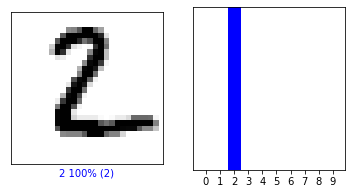

In [50]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred1, test_labels, test_images)
plot_image(i, pred2, test_labels, test_images)
plot_image(i, pred3, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred1,  test_labels)
plot_value_array(i, pred2,  test_labels)
plot_value_array(i, pred3,  test_labels)
plt.show()

1


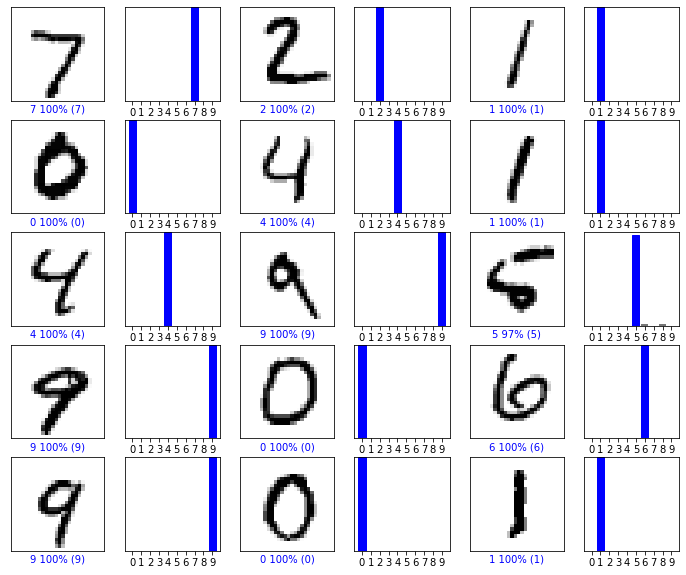

In [68]:
num_rows = 5
num_cols = 3
num_images1 = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
print("1")
for i in range(num_images1):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred1, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred1, test_labels)
plt.show()

2


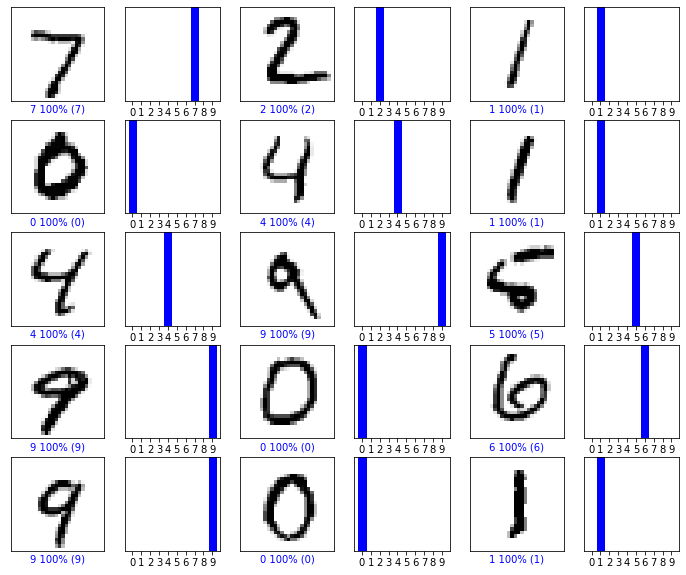

In [69]:
num_rows = 5
num_cols = 3
num_images2 = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
print("2")
for i in range(num_images2):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred2, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred2, test_labels)
plt.show()

3


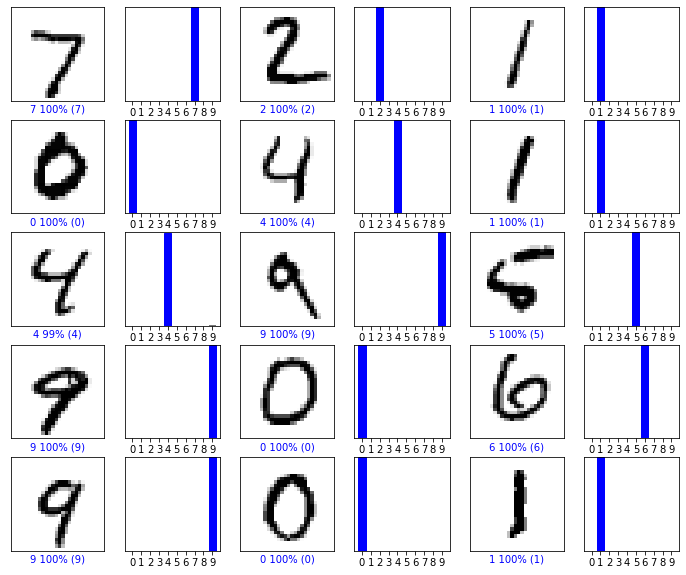

In [70]:
num_rows = 5
num_cols = 3
num_images3 = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
print("3")
for i in range(num_images3):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred3, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred3, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [53]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

## Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [58]:
index1 = error_mnist(pred1, test_labels)
index2 = error_mnist(pred2, test_labels)
index3 = error_mnist(pred3, test_labels)

index_slice1 = index1[:10]
index_slice2 = index2[:10]
index_slice3 = index3[:10]

print(index1[:10])
print(index2[:10])
print(index3[:10])

[149, 175, 184, 211, 247, 259, 266, 282, 320, 321]
[62, 247, 320, 321, 337, 340, 449, 582, 583, 625]
[151, 321, 417, 447, 449, 582, 646, 659, 691, 716]


Error of 1:


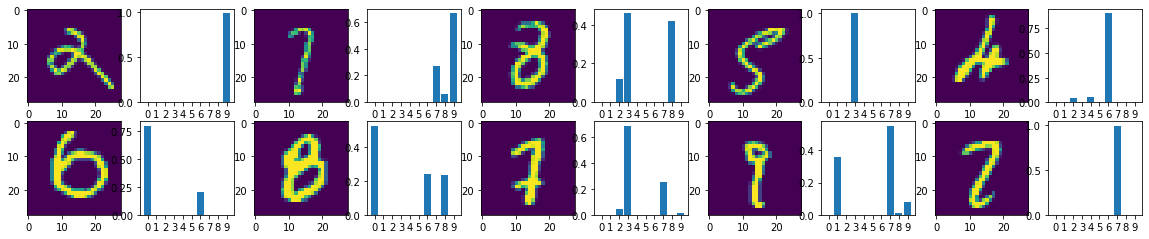

In [65]:
print("Error of 1:")
plot_error(index_slice1, pred1, test_labels)

Error of 2:


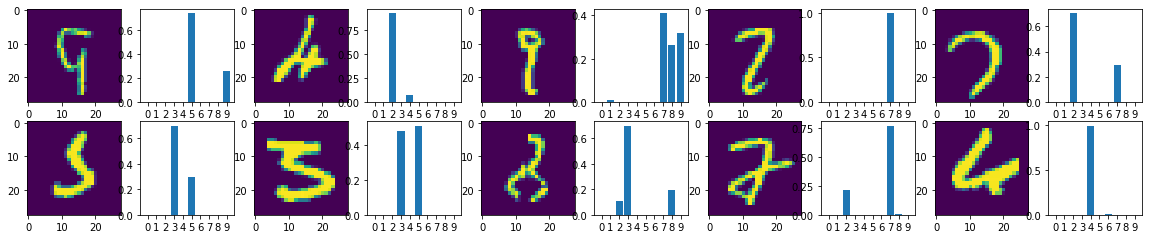

In [66]:
print("Error of 2:")
plot_error(index_slice2, pred2, test_labels)

Error of 3:


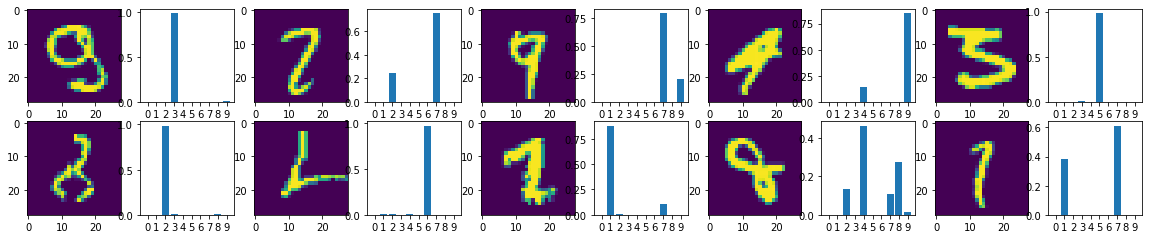

In [67]:
print("Error of 3:")
plot_error(index_slice3, pred3, test_labels)